In [16]:
import pandas as pd
import numpy as np 

In [17]:
data = "Online Retail.xlsx"

In [18]:
df = pd.read_excel(data)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [19]:
df.shape

(541909, 8)

In [25]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [26]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<AxesSubplot:title={'center':'highest purchasing countries'}>

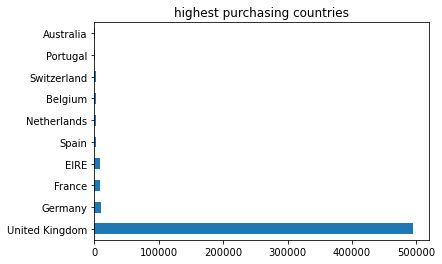

In [27]:
df['Country'].value_counts().head(10).plot(kind="barh", title="highest purchasing countries")

<AxesSubplot:title={'center':'least purchasing countries'}>

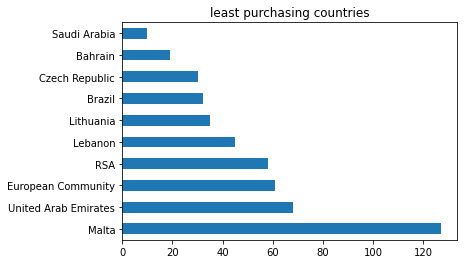

In [28]:
df['Country'].value_counts().tail(10).plot(kind="barh", title="least purchasing countries")

In [29]:
df["total_sales"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [30]:
k = [i for i in df["Description"].unique()]
k
#len(k)

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 "POPPY'S PLAYHOUSE BEDROOM ",
 "POPPY'S PLAYHOUSE KITCHEN",
 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 'IVORY KNITTED MUG COSY ',
 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 'BOX OF VINTAGE JIGSAW BLOCKS ',
 'BOX OF VINTAGE ALPHABET BLOCKS',
 'HOME BUILDING BLOCK WORD',
 'LOVE BUILDING BLOCK WORD',
 'RECIPE BOX WITH METAL HEART',
 'DOORMAT NEW ENGLAND',
 'JAM MAKING SET WITH JARS',
 'RED COAT RACK PARIS FASHION',
 'YELLOW COAT RACK PARIS FASHION',
 'BLUE COAT RACK PARIS FASHION',
 'BATH BUILDING BLOCK WORD',
 'ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE RED ',
 'ALARM CLOCK BAKELIKE GREEN',
 'PANDA AND BUNNIES STICKER SHEET',
 'STARS GIFT TAPE ',
 'INFLATAB

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   total_sales  541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


<AxesSubplot:ylabel='total_sales'>

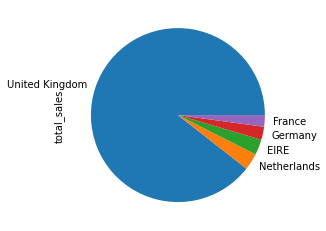

In [13]:
top_count = df.groupby("Country")["total_sales"].sum().sort_values(ascending=False)
top_count.head(5).plot(kind="pie")

<AxesSubplot:ylabel='Country'>

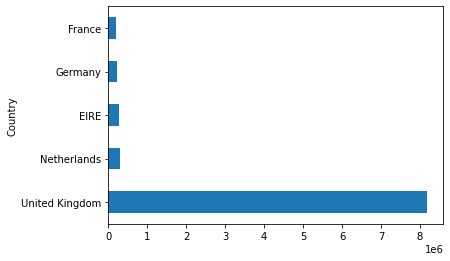

In [34]:
top_count.head(5).plot(kind="barh")

In [36]:
toyin_df = df.copy()
month_col = []
for i in toyin_df["InvoiceDate"].values:
    month_val = str(i).split("-")[1]
    month_col.append(month_val)
data_month = pd.DataFrame(month_col, columns=["month"])
tdf = pd.concat([toyin_df, data_month], axis = 1)
tdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [37]:
tdf["month"].unique()

array(['12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11'], dtype=object)

In [38]:
dec_data = tdf[tdf["month"] == '12']
dec_data["month"].unique()

array(['12'], dtype=object)

In [39]:
dec_data.shape

(68006, 10)

<AxesSubplot:title={'center':'Top dec sales'}, ylabel='Country'>

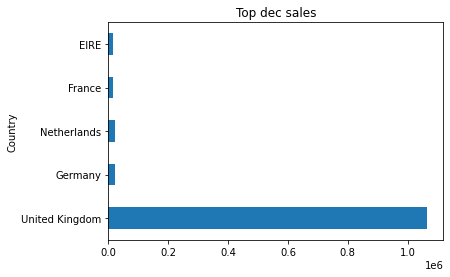

In [69]:
tdf_dec = dec_data.groupby("Country")["total_sales"].sum().sort_values(ascending=False)
tdf_dec.head(5).plot(kind="barh", title="Top dec sales")

In [41]:
jesse_df = df.copy()
jesse_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<AxesSubplot:ylabel='Description'>

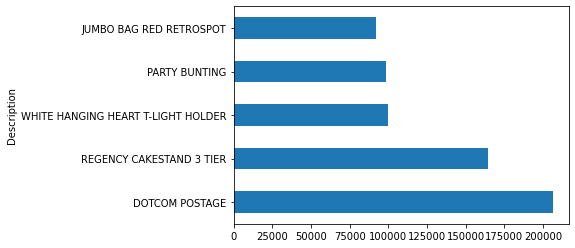

In [42]:
b = jesse_df.groupby("Description")["total_sales"].sum().sort_values(ascending=False)
b.head(5).plot(kind="barh")

In [43]:
hours = []
for i in jesse_df["InvoiceDate"].values:
    time_hour = str(i).split("T")[1][:2]
    hours.append(time_hour)
hour_df = pd.DataFrame(hours, columns=["hourly_sales"])
hour_df["hourly_sales"].unique()

array(['08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '07',
       '18', '19', '20', '06'], dtype=object)

In [44]:
df_val = pd.concat([jesse_df, hour_df], axis=1)
df_val.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,hourly_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,08
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,08
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08


<AxesSubplot:>

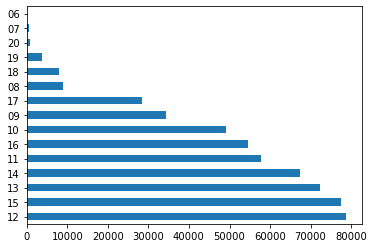

In [45]:
df_val["hourly_sales"].value_counts().sort_values(ascending=False).plot(kind="barh")

In [46]:
df_val.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_sales', 'hourly_sales'],
      dtype='object')

In [47]:
dot_p = df_val[df_val['Description'] == "DOTCOM POSTAGE"]
dot_p.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,hourly_sales
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77,14
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49,17
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43,11
5545,536864,DOT,DOTCOM POSTAGE,1,2010-12-03 11:27:00,121.06,NaN,United Kingdom,121.06,11
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47,11


uygniglgbgfvfvkytf

<AxesSubplot:>

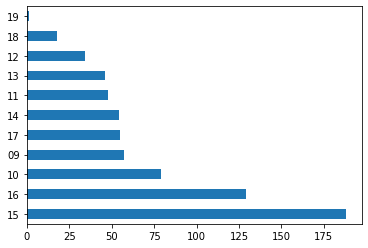

In [48]:
dot_p["hourly_sales"].value_counts().sort_values(ascending=False).plot(kind="barh")

In [49]:
# --- Developing business questions
# * why - when
# * when
# * how - when
# * what - when

In [51]:
ad_df = df.copy()
ad_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [53]:
sorted_df = ad_df.sort_values(by="total_sales", ascending = False)
sorted_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06
...,...,...,...,...,...,...,...,...,...
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,-16888.02
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.60


In [54]:
months = []
for i in sorted_df["InvoiceDate"].values:
    a = str(i).split("-")[1]
    months.append(a)
print(months[:30])

['12', '01', '06', '12', '08', '05', '09', '04', '01', '10', '01', '11', '04', '01', '08', '06', '07', '04', '08', '10', '10', '01', '10', '12', '12', '09', '12', '01', '11', '09']


In [55]:
sorted_df["months"] = months

In [56]:
sorted_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,months
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,12
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60,01
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.00,06
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33,12
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,08


In [57]:
new_adf = sorted_df[sorted_df["months"] == "12"]
new_adf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,months
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,12
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,13541.33,12
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195.0,United Kingdom,3861.00,12
16438,537659,21623,VINTAGE UNION JACK MEMOBOARD,600,2010-12-07 16:43:00,6.38,18102.0,United Kingdom,3828.00,12
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2010-12-09 10:44:00,2.55,12755.0,Japan,3794.40,12
...,...,...,...,...,...,...,...,...,...,...
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79,12
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33,12
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33,12
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46,12


In [58]:
new_adf.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_sales,months
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,-13474.79,12
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,-13541.33,12
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,-13541.33,12
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,-17836.46,12
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.60,12


In [59]:
# low_sales = new_adf[new_adf["total_sales"] < 0]
# low_sales

In [61]:
product_vals = new_adf.groupby("Description")["total_sales"].sum().sort_values(ascending= True)
product_vals

Description
AMAZON FEE                           -68666.04
CRUK Commission                       -1100.44
Bank Charges                          -1032.30
Discount                               -722.66
OFFICE MUG WARMER PINK                 -386.83
                                        ...   
BLACK RECORD COVER FRAME              11876.97
WHITE HANGING HEART T-LIGHT HOLDER    12081.89
PAPER CHAIN KIT 50'S CHRISTMAS        16075.86
REGENCY CAKESTAND 3 TIER              32800.28
DOTCOM POSTAGE                        44543.88
Name: total_sales, Length: 3470, dtype: float64

In [62]:
f_product = product_vals.reset_index()
f_product

,Description,total_sales
0,AMAZON FEE,-68666.04
1,CRUK Commission,-1100.44
2,Bank Charges,-1032.30
3,Discount,-722.66
4,OFFICE MUG WARMER PINK,-386.83
...,...,...
3465,BLACK RECORD COVER FRAME,11876.97
3466,WHITE HANGING HEART T-LIGHT HOLDER,12081.89
3467,PAPER CHAIN KIT 50'S CHRISTMAS,16075.86
3468,REGENCY CAKESTAND 3 TIER,32800.28


In [64]:
low_sales = f_product[f_product["total_sales"] <0]
low_sales

,Description,total_sales
0,AMAZON FEE,-68666.04
1,CRUK Commission,-1100.44
2,Bank Charges,-1032.30
3,Discount,-722.66
4,OFFICE MUG WARMER PINK,-386.83
5,SAMPLES,-64.95
6,WOODEN BOX ADVENT CALENDAR,-49.70
7,PINK FOXGLOVE ARTIIFCIAL FLOWER,-30.60
8,PACK OF 12 CHRISTMAS FUN CARDS,-28.02
9,ZINC TOP 2 DOOR WOODEN SHELF,-25.80


<AxesSubplot:ylabel='Description'>

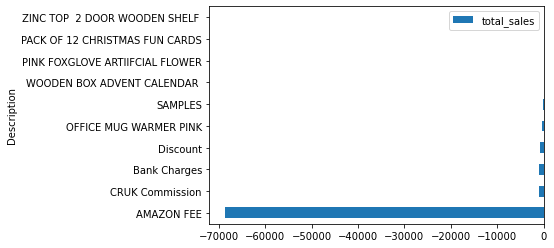

In [65]:
low_sales.head(10).plot(x="Description", y="total_sales", kind= "barh")

In [67]:
high_sales = f_product[f_product["total_sales"] > 0]
high_s = high_sales.sort_values(by="total_sales", ascending= False)
high_s

,Description,total_sales
3469,DOTCOM POSTAGE,44543.88
3468,REGENCY CAKESTAND 3 TIER,32800.28
3467,PAPER CHAIN KIT 50'S CHRISTMAS,16075.86
3466,WHITE HANGING HEART T-LIGHT HOLDER,12081.89
3465,BLACK RECORD COVER FRAME,11876.97
...,...,...
54,METAL BASE FOR CANDLES,0.42
53,"SILICON CUBE 25W, BLUE",0.42
52,DECORATION WOBBLY CHICKEN,0.39
51,DECORATION WOBBLY RABBIT METAL,0.39


<AxesSubplot:ylabel='Description'>

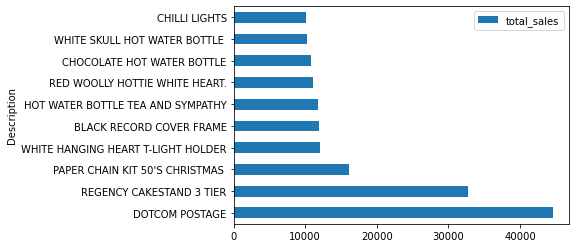

In [68]:
high_s.head(10).plot(x="Description", y="total_sales", kind= "barh")

# Class Work- Determine the month with the lowest and highest sales

### lowest sales


In [79]:
lowest_sales = sorted_df.groupby("months")["total_sales"].sum().sort_values(ascending=False).head(6)
lowest_sales

months
11    1461756.250
12    1182625.030
10    1070704.670
09    1019687.622
05     723333.510
06     691123.120
Name: total_sales, dtype: float64

<AxesSubplot:ylabel='months'>

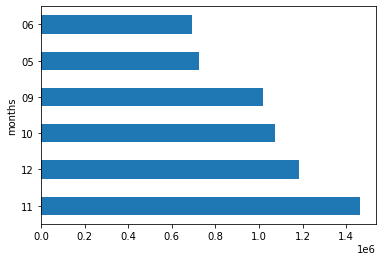

In [81]:
lowest_sales.plot(kind= "barh")

## highest sales

In [82]:
highest_sales = sorted_df.groupby("months")["total_sales"].sum().sort_values(ascending=True).head(6)
highest_sales

months
04    493207.121
02    498062.650
01    560000.260
07    681300.111
08    682680.510
03    683267.080
Name: total_sales, dtype: float64

<AxesSubplot:ylabel='months'>

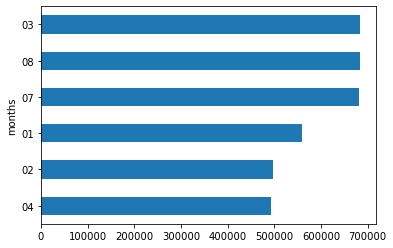

In [83]:
highest_sales.plot(kind= "barh")